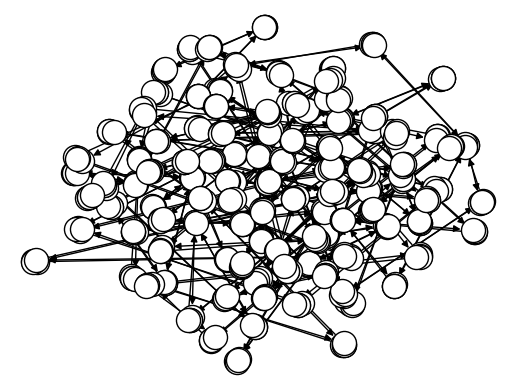

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

INPUT_PATH = '../input/16.in'
TEST_MOD = [
    ('../test/16.in', 45),
    # ('../test/16-1.in', 64),
    # ('../test/16_reddit.in', 149),
    # ('../test/16_reddit2.in', 413),
]

options = {
    "node_color": "white",
    "edgecolors": "black",
}


def get_ans(file_path: str):
    lines = [line.rstrip() for line in open(file_path)]
    maze = []
    for l in lines:
        maze.append([*l])

    start, end = None, None
    for y, l in enumerate(maze):
        for x, c in enumerate(l):
            if c == 'S':
                start = (x, y)
            elif c == 'E':
                end = (x, y)

    graph: nx.DiGraph = nx.DiGraph()
    start_node = (start[0], start[1], 1, 0)
    q = [start_node]
    while len(q) > 0:
        node_a = q.pop()
        x, y, dx, dy = node_a
        actions = [
            ((x+dx, y+dy), (dx, dy), 1), # move forward
            ((x, y), (dy, -dx), 1000), # turn left
            ((x, y), (-dy, dx), 1000), # turn right
        ]
        for (new_x, new_y), (new_dx, new_dy), weight in actions:
            if maze[new_y][new_x] == '#':
                continue
            node_b = (new_x, new_y, new_dx, new_dy)
            existing_edge = graph.get_edge_data(node_a, node_b)
            if existing_edge == None or existing_edge.get('weight') > weight:
                graph.add_edge(node_a, node_b, weight=weight)
                q.append(node_b)

    visited = set()
    min_weight = 0xffffffff
    all_paths = []
    # Find all shortest paths to the end of every facing directions
    for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
        paths = nx.all_shortest_paths(graph, start_node, (end[0], end[1], dx, dy), 'weight')
        paths = [p for p in paths]
        all_paths.append(paths)
        min_weight = min([nx.path_weight(graph, p, 'weight') for p in paths] + [min_weight])

    best_paths = []
    # get shortest paths with minimum weight (sounds idempotent I know)
    for paths in all_paths:
        for p in paths:
            if nx.path_weight(graph, p, 'weight') == min_weight:
                best_paths.append(p)

    for path in best_paths:
        for (x, y, dx, dy) in path:
            visited.add((x, y))
            # maze[y][x] = 'O'
    # for l in maze:
    #     print(' '.join(l))

    # print(len(visited))
    # print()

    nx.draw_networkx(graph, with_labels=False, **options)

    # Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    ax.margins(0.001)
    plt.axis("off")
    plt.show()

    return len(visited)


if __name__ == '__main__':
    for path, ans in TEST_MOD:
        test_ans = get_ans(path)
        assert test_ans == ans, f"Test failed (got {test_ans}, expected {ans})"
    # print(get_ans(INPUT_PATH))
